In [1]:
import tensorflow as tf # для работы с нейронными сетями
import tensorflow_datasets as tfds

import os # для работы с файловой системой
import numpy as np #
import matplotlib.pyplot as plt #

from keras_preprocessing.image import load_img, img_to_array, save_img # загрузка и конвертация изображений
from keras_preprocessing.image import ImageDataGenerator # генератор изображений

from keras import Sequential, layers, Input


c:\Users\vlada\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Аугментация в искусственном интеллекте означает улучшение или расширение данных путем добавления новой информации или изменения существующей информации.

## 1. Выбрать датасет и модель

In [2]:
base_dir = os.path.join(os.path.dirname(r"C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv"), 'final_symbols_split_ttv')

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

file_names = [str(i) for i in range(10)] 

train_dirs = {str(i): os.path.join(train_dir, str(i)) for i in file_names}
validation_dirs = {str(i): os.path.join(validation_dir, str(i)) for i in file_names}

# Создание словарей для директорий
train_dirs = {str(i): os.path.join(train_dir, str(i)) for i in file_names}
validation_dirs = {str(i): os.path.join(validation_dir, str(i)) for i in file_names}

# Подсчет количества файлов в каждой директории
num_train_files = {k: len(os.listdir(v)) for k, v in train_dirs.items()}
num_val_files = {k: len(os.listdir(v)) for k, v in validation_dirs.items()}

print(num_train_files)

# Пример вывода результатов
for i in file_names:
    print(f"Количество файлов для тренировки {i}: {num_train_files[i]}")
    print(f"Количество файлов для валидации {i}: {num_val_files[i]}")

{'0': 2408, '1': 3631, '2': 3828, '3': 2594, '4': 3189, '5': 2827, '6': 2983, '7': 3253, '8': 2783, '9': 3212}
Количество файлов для тренировки 0: 2408
Количество файлов для валидации 0: 299
Количество файлов для тренировки 1: 3631
Количество файлов для валидации 1: 453
Количество файлов для тренировки 2: 3828
Количество файлов для валидации 2: 478
Количество файлов для тренировки 3: 2594
Количество файлов для валидации 3: 323
Количество файлов для тренировки 4: 3189
Количество файлов для валидации 4: 397
Количество файлов для тренировки 5: 2827
Количество файлов для валидации 5: 353
Количество файлов для тренировки 6: 2983
Количество файлов для валидации 6: 373
Количество файлов для тренировки 7: 3253
Количество файлов для валидации 7: 405
Количество файлов для тренировки 8: 2783
Количество файлов для валидации 8: 346
Количество файлов для тренировки 9: 3212
Количество файлов для валидации 9: 401


## 2. Дополнить данные новыми изображениями (не менее 5 собственных изображений, не менее 10 аугментированных с использованием не менее 3 различных способов аугментации) и провести разметку данных. 

В примере были указаны следующие аугментации:
- rotation_range: случайные повороты изображений на угол в заданных пределах.
- width_shift_range, height_shift_range: случайные сдвиги изображения по горизонтали или вертикали в заданных пределах.
- zoom_range: случайное масштабирование изображение в заданных пределах.
- horizontal_flip, vertical_flip: случайные зеркальные отражения изображения по горизонтали или вертикали.
- channel_shift_range: случайный сдвиг цветовых каналов изображения в заданных пределах.
- shear_range: случайный сдвиг с превращением в параллелограмм в заданных пределах (см. пример ниже).
- brightness_range: случайное изменение яркости изображения в заданных пределах.
- zca_whitening: отбеливание изображения

Будем использовать: случайные повороты, случайные сдвиги и отбеливание

In [3]:
# Функция для загрузки и преобразования изображения
def load_and_process_image(image_path, target_size=(256, 256)):
    image = load_img(image_path, target_size=target_size)  # загружаем в память с диска с указанием размера
    image = img_to_array(image).astype('uint8')  # конвертируем в тензор целых чисел
    return image

Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\image_0.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\8\image_1.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\image_2.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\3\image_3.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\image_4.png


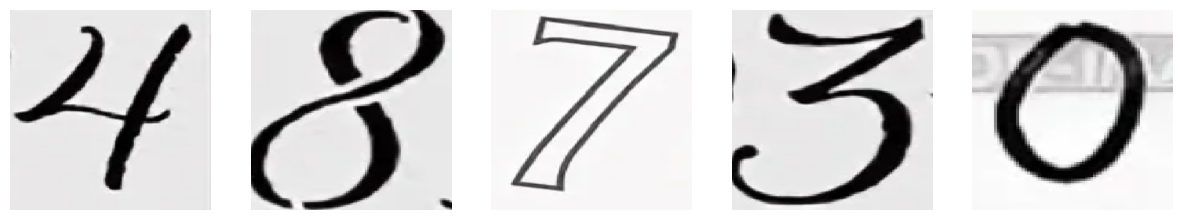

In [4]:
# Пути к изображениям
image_paths = ['four.png', 'eight.png', 'seven.png', 'three.png', 'zero.png'] 
labels = [4, 8, 7, 3, 0]  # метки классов для каждого изображения

# Загрузка и подготовка данных
images = [load_and_process_image(image_path) for image_path in image_paths]
data = np.array(images)  # Конвертируем список изображений в массив numpy

# Сохранение изображений в соответствующие директории
for i, (image, label) in enumerate(zip(data, labels)):
    # class_dir = os.path.join(test_dir, str(label))  # Директория для класса
    class_dir = os.path.join(train_dir, str(label))  # Директория для класса

    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    save_path = os.path.join(class_dir, f'image_{i}.png')
    save_img(save_path, image)
    print(f"Сохранено {save_path}")

# Отображение изображений
fig, axes = plt.subplots(1, 5, figsize=(15, 15))  # Создаем фигуру с 5 подграфиками
for i, ax in enumerate(axes):
    ax.axis('off')
    ax.imshow(data[i])  # Рисуем каждое изображение

plt.show()


In [5]:
# Создаем пустой генератор
def default_datagen():
    datagen = ImageDataGenerator(
        fill_mode='constant',  # чем заполнять пиксели которые оказались пустыми, по умолчанию 0
        dtype='uint8'          # тип данных
    )
    datagen.fit(data)  # настраиваем под данные все переменные (среднее, разброс и др.)
    return datagen

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, save_img
from PIL import Image, ImageDraw, ImageFont


In [21]:
def add_shape_and_text(image, text="hi"):
    image_pil = Image.fromarray(image)
    draw = ImageDraw.Draw(image_pil)
    # Координаты фигуры (прямоугольник)
    shape_coords = [(10, 10), (100, 100)]
    # Цвет фигуры
    shape_color = (255, 0, 0)  # красный
    # Добавляем фигуру
    draw.rectangle(shape_coords, fill=shape_color)
    # Параметры текста
    text_position = (60, 10)
    text_color = (255, 255, 255)  # белый
    font = ImageFont.load_default()

    # Добавляем текст
    draw.text(text_position, text, font=font, fill=text_color)
    
    return np.array(image_pil)

In [19]:
def plot_and_save_augmentation(datagen, data, save_dir, start_num, n_rows=3, n_cols=3):
    '''
    Выполняем аугментации, рисуем и сохраняем результат
    принимает генератор ImageDataGenerator, исходные данные (изображения) data, путь для сохранения save_dir.
    можем указать число строк и столбцов для результата n_rows и n_cols (по умолчанию 5, 5)
    '''
    labels = [4, 8, 7, 3, 0]  # метки классов для каждого изображения

    n_images = n_rows * n_cols  # число генерируемых аугментированных изображений
    gen_flow = datagen.flow(data, labels, batch_size=1)  # задаем данные для генератора
    # создаем директорию для сохранения, если она не существует
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # рисуем и сохраняем
    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    i = 0
    for image_index in range(start_num, start_num + n_images):
        image, label = next(gen_flow)  # следующее изображение и метка из генератора
        class_dir = os.path.join(save_dir, str(label[0]))  # директория для данного класса

        # создаем директорию для сохранения, если она не существует
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        
        # Добавляем фигуру и текст на изображение
        image_with_shape_and_text = add_shape_and_text(image[0].astype('uint8'))
        
        plt.subplot(n_rows, n_cols, i + 1)  # его подграфик
        plt.axis('off')
        plt.imshow(image_with_shape_and_text, vmin=0, vmax=255)  # рисуем его

        # сохраняем изображение
        save_path = os.path.join(class_dir, f'augmented_image_{image_index}.png')
        save_img(save_path, image_with_shape_and_text)
        print(f"Сохранено {save_path}")
        i+=1
    plt.show()

### Аугментация

### Случайные повороты

Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\3\augmented_image_0.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\8\augmented_image_1.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\augmented_image_2.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\augmented_image_3.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_4.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\8\augmented_image_5.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\augmented_image_6.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_7.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\pr

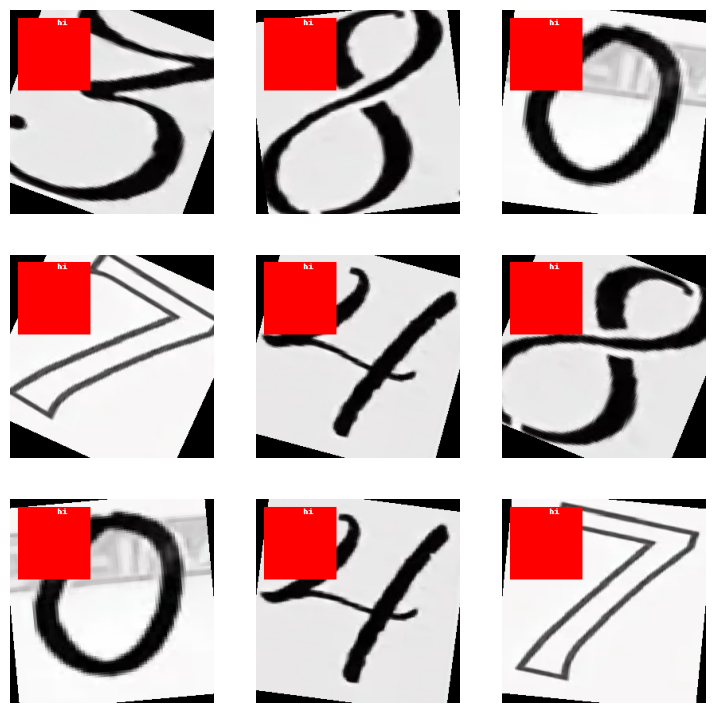

In [22]:
datagen = default_datagen() # пустой генератор
datagen.rotation_range = 25 # добавляем повороты (в градусах +-)
plot_and_save_augmentation(datagen, data, train_dir, 0)


### Случайные сдвиги

Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\8\augmented_image_0.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\augmented_image_1.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\3\augmented_image_2.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\augmented_image_3.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_4.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\augmented_image_5.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\3\augmented_image_6.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_7.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\pr

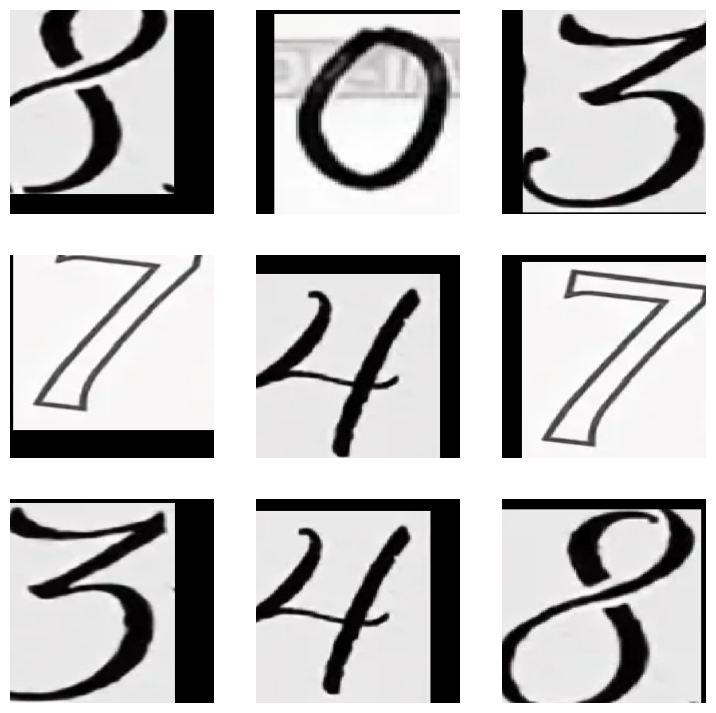

In [ ]:
datagen = default_datagen() # пустой генератор
datagen.width_shift_range = 0.2 # добавляем сдвиги по ширине
datagen.height_shift_range = 0.2 # добавляем сдвиги по высоте
plot_and_save_augmentation(datagen, data, train_dir, 0)

### Отбеливание

c:\Users\vlada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_0.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\3\augmented_image_1.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\augmented_image_2.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\augmented_image_3.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\8\augmented_image_4.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\7\augmented_image_5.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\4\augmented_image_6.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\practice5\final_symbols_split_ttv\train\0\augmented_image_7.png
Сохранено C:\Users\vlada\Desktop\work\2 course\II\pr5\pr

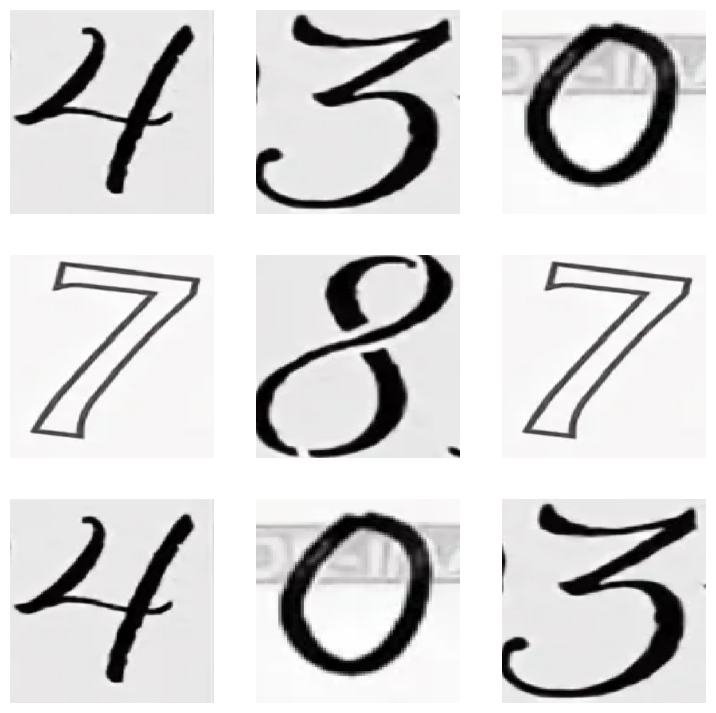

In [ ]:
datagen = default_datagen() # пустой генератор
datagen.zca_whitening = True
plot_and_save_augmentation(datagen, data, train_dir, 0)

## Разметка данных

In [ ]:
num_classes = 10  # число классов 
input_shape = (28, 28, 1)  # размер изображений (1 - черно-белые)
# Создаем генератор данных
datagen = ImageDataGenerator(rescale=1.0/255.0)  # нормализуем изображения
# Генератор тренировочных данных
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),  # размер изображений
    color_mode='grayscale',  # изображения черно-белые
    batch_size=32,
    class_mode='categorical'  # используем категориальную классификацию
)
# Генератор валидационных данных
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),  # размер изображений
    color_mode='grayscale',  # изображения черно-белые
    batch_size=32,
    class_mode='categorical'  # используем категориальную классификацию
)
# Генератор тестовых данных
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),  # размер изображений
    color_mode='grayscale',  # изображения черно-белые
    batch_size=32,
    class_mode='categorical',  # используем категориальную классификацию
    shuffle=False  # не перемешивать тестовые данные
)
# Проверяем классы
print(test_generator.class_indices)
# Проверяем количество изображений в каждом классе
print(test_generator.classes)


Found 30708 images belonging to 10 classes.
Found 3828 images belonging to 10 classes.
Found 3849 images belonging to 10 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
[0 0 0 ... 9 9 9]


## Обучение модели

CNN - сверточная нейронная сеть для задачи классификации 

In [ ]:
# Создаем модель
model = Sequential(
    [
        Input(shape=input_shape), # размеры изображения
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
# Компилируем модель
model.compile(
    loss="categorical_crossentropy",  # кросс-энтропия, одна из возможных функций ошибки
    optimizer="adam",  # метод обучения Adam - модификация градиентного спуска
    metrics=["accuracy"]  # метрика accuracy (точность)
)
model.summary() # информация о модели

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучаем модель
batch_size = 32
epochs = 10 # 10 этапов обучения

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # кол-во шагов на этапе
    validation_data=validation_generator, # данные для проверки на этапе
    validation_steps=validation_generator.samples // validation_generator.batch_size, # кол-во шагов проверки на этапе
    epochs=epochs
)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

Epoch 1/10


c:\Users\vlada\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


959/959 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.7125 - loss: 0.9095 - val_accuracy: 0.9301 - val_loss: 0.2245
Epoch 2/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.9062 - loss: 0.2416 - val_accuracy: 0.9500 - val_loss: 0.2408
Epoch 3/10
  6/959 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9395 - loss: 0.2307 

c:\Users\vlada\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9359 - loss: 0.2063 - val_accuracy: 0.9459 - val_loss: 0.1654
Epoch 4/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.9688 - loss: 0.0921 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 5/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9650 - loss: 0.1117 - val_accuracy: 0.9590 - val_loss: 0.1384
Epoch 6/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.9688 - loss: 0.0914 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 7/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9772 - loss: 0.0734 - val_accuracy: 0.9688 - val_loss: 0.0955
Epoch 8/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.9375 - loss: 0.1693 - val_accuracy: 0.9500 - val_loss: 0.0584
Epoch 9/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9849 - loss: 0.0477 - val_accuracy: 0.9722 - val_loss: 0.0867
Epoch 10/10
959/959 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 

По этим данным видно, что модель качественная. Значение функции потерь равно 0,098, а точность равно около 96 процентов, а значит, в большинстве случаях модель даст правильный ответ

In [ ]:
# Пример предсказания на тестовом изображении
test_example = 0  # индекс примера
test_input, test_label = test_generator[test_example]
test_output = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


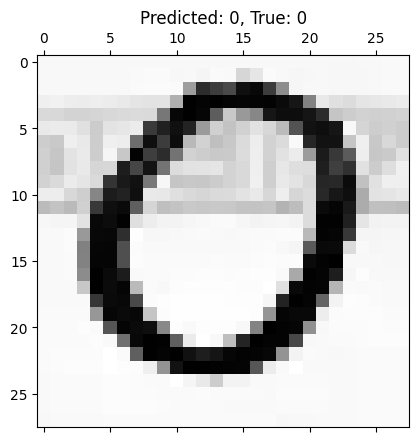

In [ ]:
plt.matshow(test_input[0].reshape(28, 28), cmap='gray')  # рисуем изображение
plt.title(f'Predicted: {np.argmax(test_output[0])}, True: {np.argmax(test_label[0])}')
plt.show()

Как и ожидалось, модель сделала правильный вывод о том, что ноль - это ноль